In [1]:
# download data
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("../datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    pass

# fetch_housing_data()

In [2]:
# load data
import pandas as pd
housing = pd.read_csv('../datasets/housing/housing.csv')
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

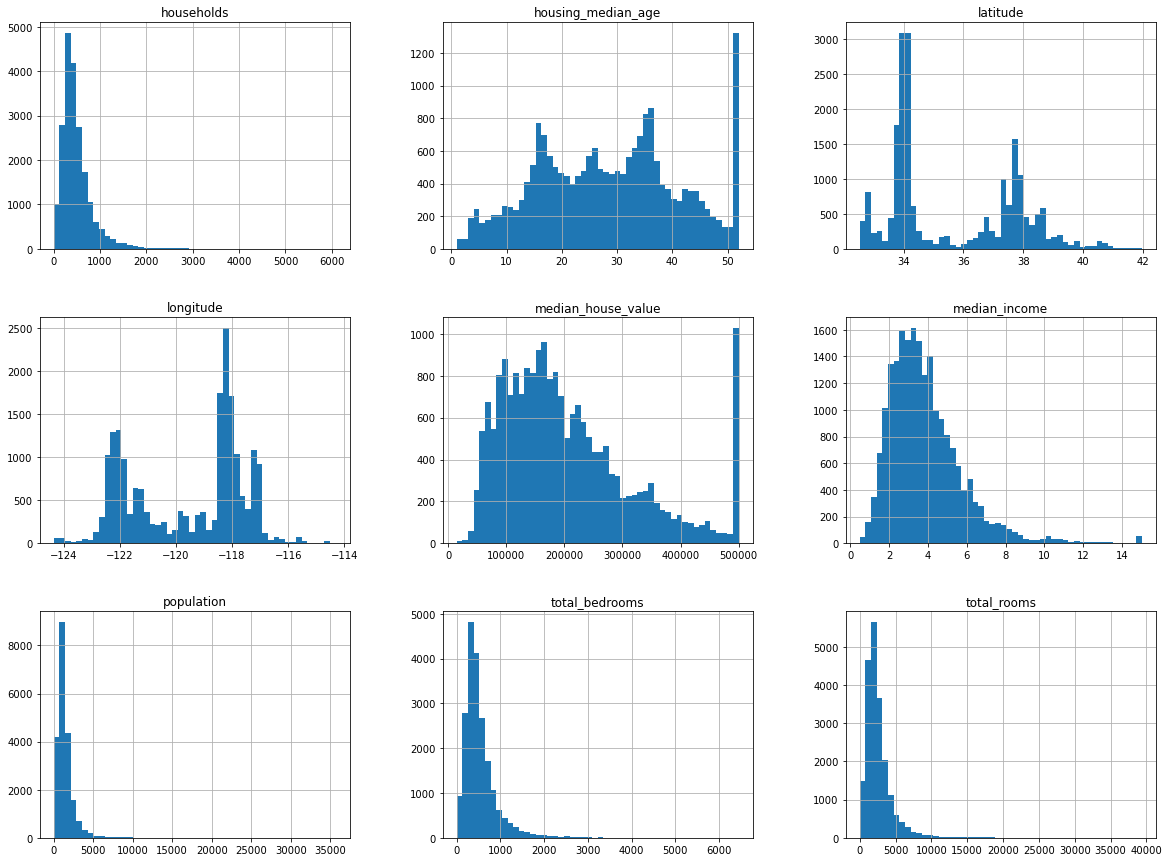

In [3]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [4]:
# preparing dataset
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    testset_size = int(len(data)*test_ratio)
    testset_indices = shuffled_indices[:testset_size]
    trainset_indices = shuffled_indices[testset_size:]
    return data.iloc[trainset_indices], data.iloc[testset_indices]
    pass

X, y = split_train_test(housing, 0.3)

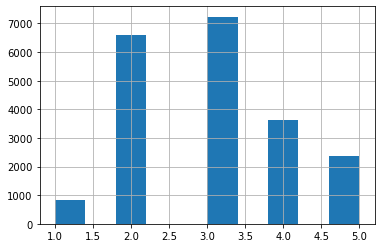

In [5]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])
housing['income_cat'].hist()
plt.show()

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: income_cat, dtype: float64

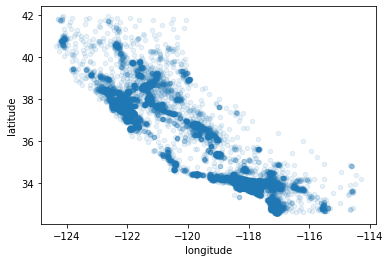

In [7]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

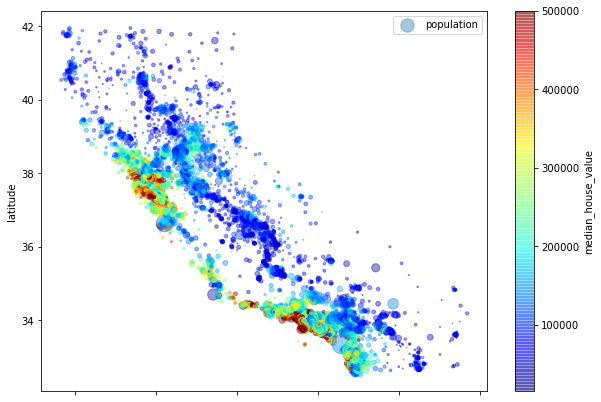

In [8]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,)
plt.legend()

In [9]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.plot()

[]

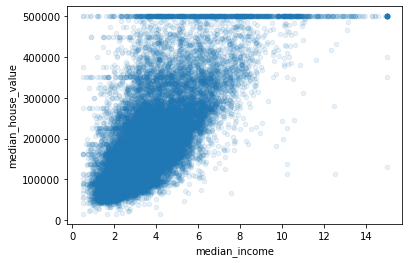

In [11]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [12]:
# data cleaning
housing = strat_train_set.drop('median_house_value',axis=1)
housing_label = strat_train_set['median_house_value'].copy()

housing['total_bedrooms'].fillna(0, inplace=True)

In [13]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
impute.fit(housing_num)

SimpleImputer(strategy='median')

In [14]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
8577        <1H OCEAN
5960           INLAND
4753        <1H OCEAN
15423       <1H OCEAN
9788           INLAND
16873      NEAR OCEAN
8106       NEAR OCEAN
14913      NEAR OCEAN
14427      NEAR OCEAN
3870        <1H OCEAN

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [0.]])

In [19]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)
housing_cat_1hot

<14448x5 sparse matrix of type '<class 'numpy.float64'>'
	with 14448 stored elements in Compressed Sparse Row format>